<a href="https://colab.research.google.com/github/etorres14/PremierLeague-Analysis/blob/main/PremierLeague_home_advantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premier League: Predicting Match Restults

### Edward Torres

## Objective

Using Premier League match fixutre data, I want to explore the importance of home field advantage. Furthermore I want to create new columns/features to generate a model to predict match results. 

## Table of Contents
---



*   Load Dependencies/Data
*   Clean Data
*   Data Visualization
*   Feature Creation
*   Building Model







In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import time

In [2]:
# Get Data
def get_data(url):
  time.sleep(2)
  df = pd.read_html(url, header = 0)
  return df[0]

pl18 = get_data("https://fbref.com/en/comps/9/1631/schedule/2017-2018-Premier-League-Scores-and-Fixtures")
pl19 = get_data("https://fbref.com/en/comps/9/1889/schedule/2018-2019-Premier-League-Scores-and-Fixtures")
pl20 = get_data("https://fbref.com/en/comps/9/3232/schedule/2019-2020-Premier-League-Scores-and-Fixtures")
pl21 = get_data("https://fbref.com/en/comps/9/10728/schedule/2020-2021-Premier-League-Scores-and-Fixtures")
pl22 = get_data("https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures")

## Basic Data Cleaning
---

In [3]:
pl22.head(3)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2021-08-13,20:00,Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver,Match Report,NaN
1,1.0,Sat,2021-08-14,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney,Match Report,NaN
2,1.0,Sat,2021-08-14,15:00,Leicester City,0.8,1–0,1.1,Wolves,31983.0,King Power Stadium,Craig Pawson,Match Report,NaN


In [4]:
print(pl22.isnull().sum())
#153 matches haven't been played yet so I want to probably create a subset of my data with only matches that have been played
#I'll do this towards the end


print(pl22.info())
#Need to fix Date column and Time column
#Label Home and Away XG's
#Split Score and make columns for Home and Away Score, then reoder.
#Drop Match Report Column
#Create a column that indicates the final match result

Wk               68
Day              68
Date             68
Time             68
Home             68
xG               81
Score            81
xG.1             81
Away             68
Attendance       82
Venue            68
Referee          81
Match Report     68
Notes           448
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wk            380 non-null    float64
 1   Day           380 non-null    object 
 2   Date          380 non-null    object 
 3   Time          380 non-null    object 
 4   Home          380 non-null    object 
 5   xG            367 non-null    float64
 6   Score         367 non-null    object 
 7   xG.1          367 non-null    float64
 8   Away          380 non-null    object 
 9   Attendance    366 non-null    float64
 10  Venue         380 non-null    object 
 11  Referee       367 non-null    object 


In [5]:
#split Score column into away and home score
def home_score(input):
  input = str(input)
  return input[0]
def away_score(input):
  input = str(input)
  return input[2]


In [6]:
#compares home and away scores columns to get result of the match.
def get_result(row):
  if row.Home_Score > row.Away_Score:
    return "H"
  elif row.Home_Score < row.Away_Score:
    return "A"
  elif row.Home_Score == row.Away_Score:
    return "D"
  else:
    return None


In [7]:
# Function to clean datasets
def clean_data(data):
  # Change Date column to DateTime format
  data['Date'] = pd.to_datetime(data['Date'])

  #rename xG columns
  data.rename(columns={'xG': 'HxG', 'xG.1': 'AxG'}, inplace=True) 

  #split Score column into away and home score
  data["Home_Score"] = data.Score.apply(home_score)
  data["Away_Score"] = data.Score.apply(away_score)

  #get rid of the n's in our new columns and converts our columns data type into float
  data = data.replace({'n': None})
  data["Home_Score"] = pd.to_numeric(data["Home_Score"])
  data["Away_Score"] = pd.to_numeric(data["Away_Score"])

  #compares home and away scores to get match result.
  data["Result"] = data.apply(get_result, axis = "columns")

  #drop and reorganize the columns
  data = data[['Wk', 'Day', 'Date', 'Time', 'Home', 'HxG','Home_Score', 'Away_Score', 'AxG', 'Away', "Result",
       'Attendance', 'Venue', 'Referee', 'Notes']]
  return data



pl18 = clean_data(pl18)
pl19 = clean_data(pl19)
pl20 = clean_data(pl20)
pl21 = clean_data(pl21)
pl22 = clean_data(pl22)


## Data Visualization: Exploring Home Field Advantage
____

Fans are a huge part of any major sport. In this section we look to explore the impact a home field packed with supporters has on a match. To do this we will look at the current premier league season. We will then compare the current season to the previous season, where there were no fans present at matches due to covid.

#### Home vs Away Frequency of Goal Scored in a Game

2021/2022 Premier League Season

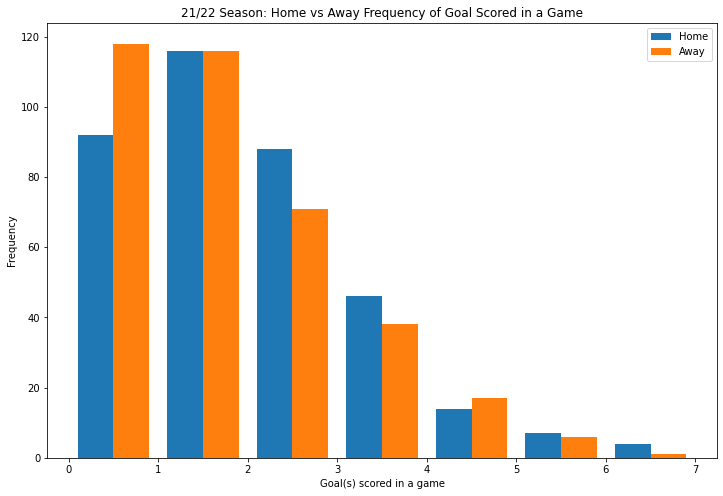

In [31]:
plt.hist([pl22.Home_Score, pl22.Away_Score], bins = 7, label=['Home', 'Away'])
plt.legend(loc='upper right')
plt.xlabel("Goal(s) scored in a game")
plt.ylabel("Frequency")
plt.title("21/22 Season: Home vs Away Frequency of Goal Scored in a Game")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

2020/2021 Premier League Season: No Fans

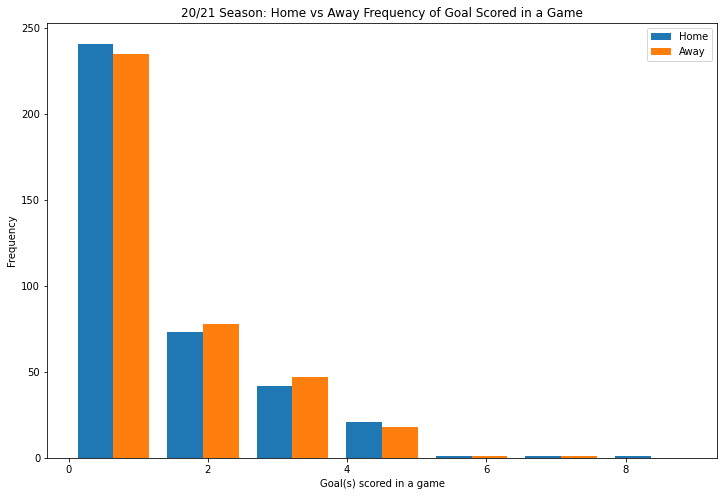

In [9]:
plt.hist([pl21.Home_Score, pl21.Away_Score], bins = 7, label=['Home', 'Away'])
plt.legend(loc='upper right')
plt.xlabel("Goal(s) scored in a game")
plt.ylabel("Frequency")
plt.title("20/21 Season: Home vs Away Frequency of Goal Scored in a Game")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

#### Frequency of Match Restults: Bar Chart & Pie Chart

2021/2022 Premier League Season

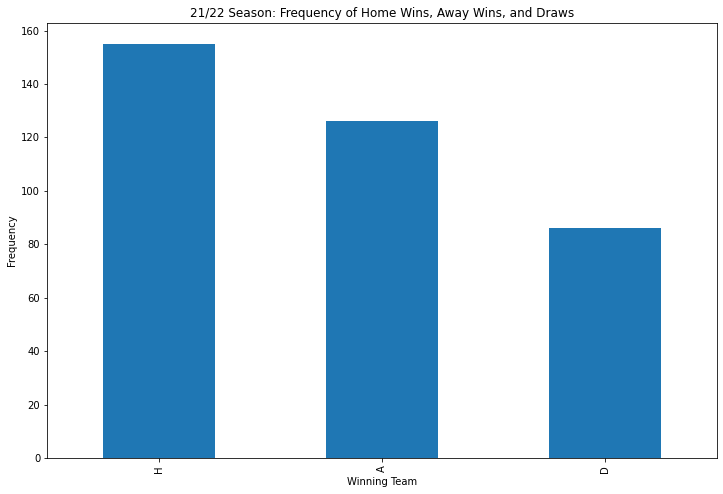

In [10]:
pl22.Result.value_counts().plot(kind = "bar")
plt.ylabel("Frequency")
plt.xlabel("Winning Team")
plt.title("21/22 Season: Frequency of Home Wins, Away Wins, and Draws")
plt.show;

2020/2021 Premier League Season: No Fans

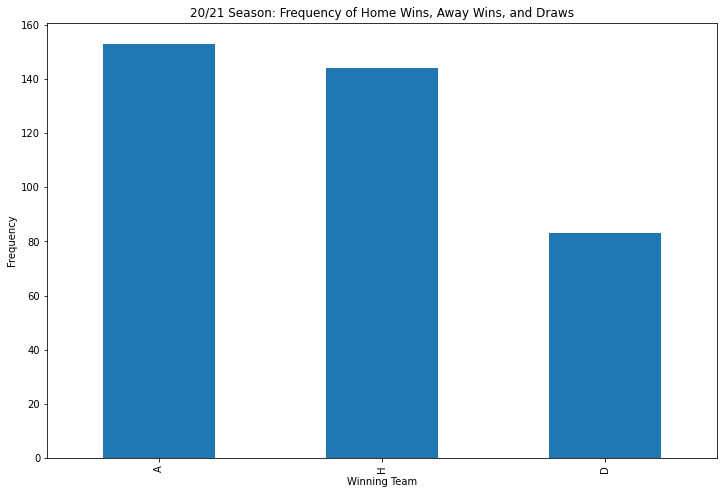

In [11]:
pl21.Result.value_counts().plot(kind = "bar")
plt.ylabel("Frequency")
plt.xlabel("Winning Team")
plt.title("20/21 Season: Frequency of Home Wins, Away Wins, and Draws")
plt.show;

2021/2022 Premier League Season

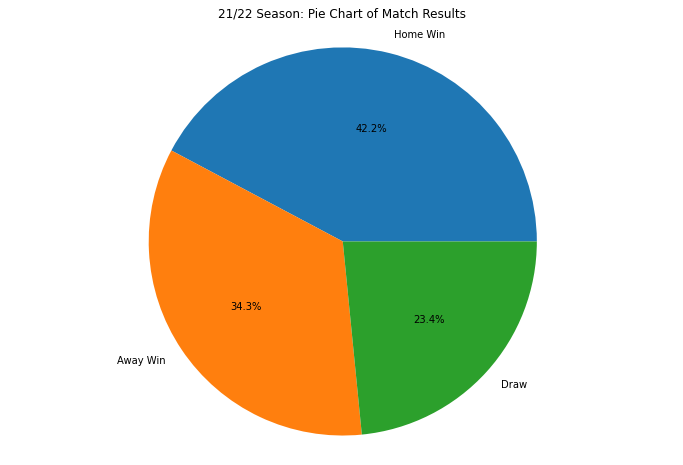

In [12]:
label = ['Home Win', 'Away Win', 'Draw']
plt.pie(pl22.Result.value_counts(),labels = label,autopct='%1.1f%%')
plt.title('21/22 Season: Pie Chart of Match Results')
plt.axis('equal')
plt.show()

2020/2021 Premier League Season: No Fans

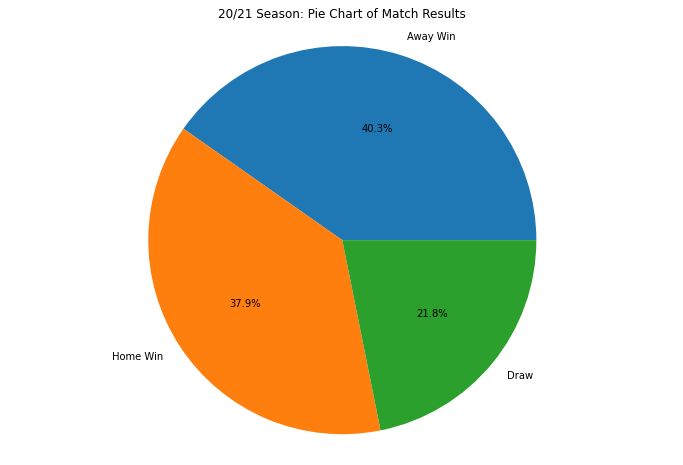

In [13]:
label = ['Away Win', 'Home Win', 'Draw']
plt.pie(pl21.Result.value_counts(),labels = label,autopct='%1.1f%%')
plt.title('20/21 Season: Pie Chart of Match Results')
plt.axis('equal')
plt.show()

#### Home vs. Away Average Goals Per For Every Team

In [14]:
#Create another data frame with fixtures that have already been played
df1 = pl22[pl22["Home_Score"].isnull() == False]

#create a sorted team names array that will be usefull later
teams = df1.Home.unique()
teams = np.sort(teams)

2021/2022 Premier League Season

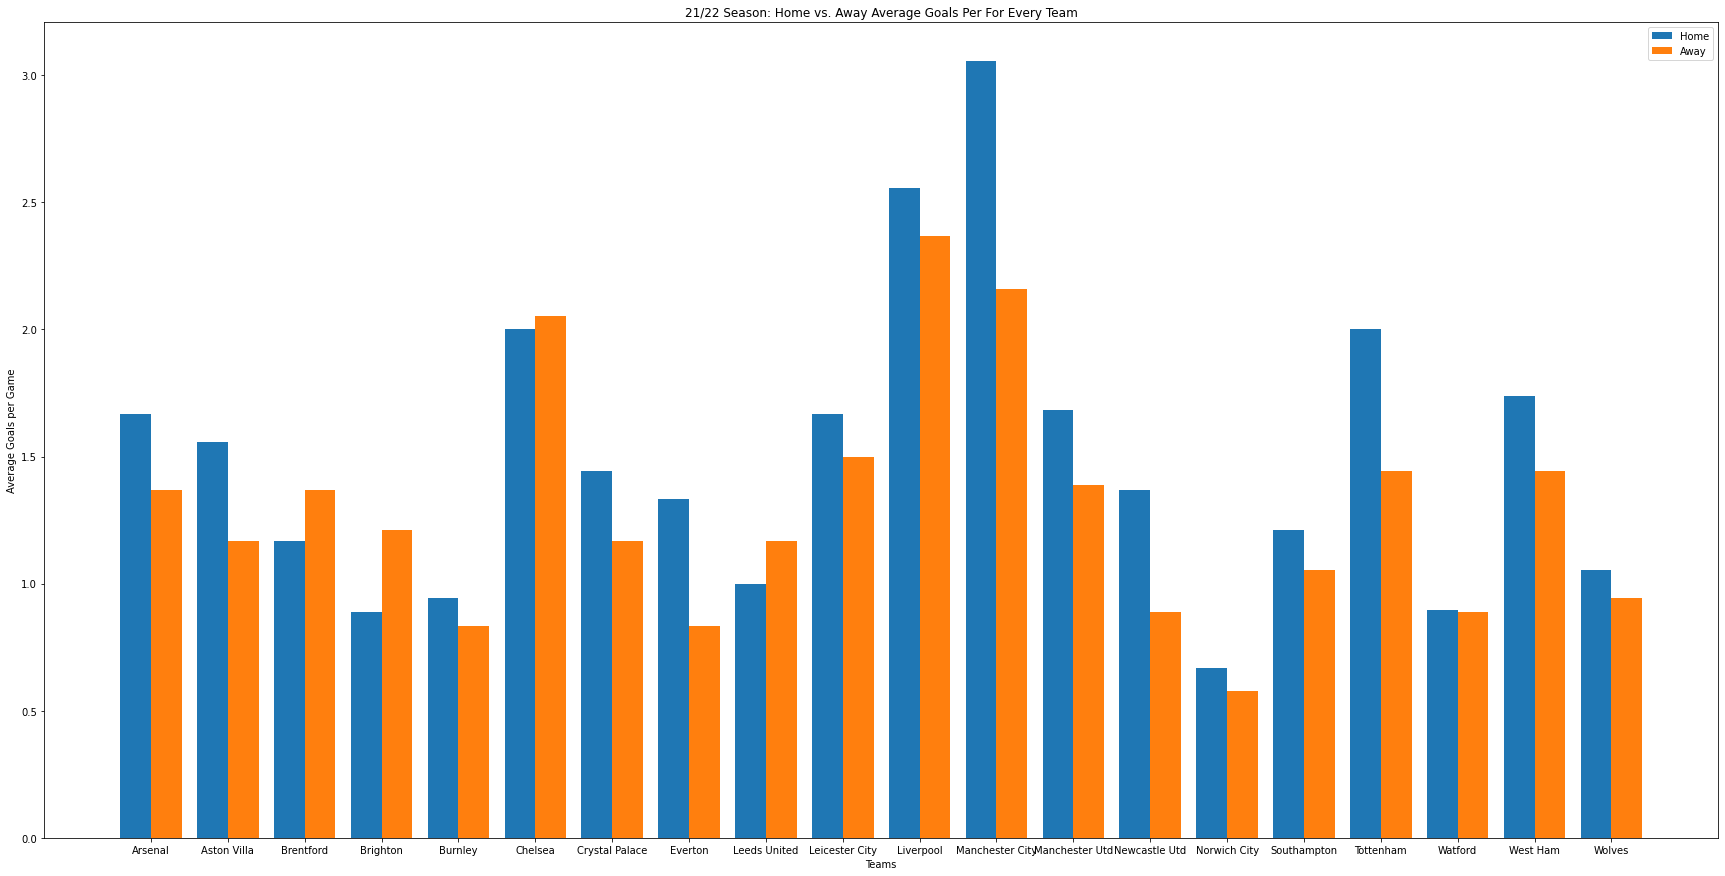

In [33]:
X_axis = np.arange(len(teams))
  
plt.bar(X_axis - 0.2, pl22.groupby("Home").Home_Score.mean(), 0.4, label = 'Home')
plt.bar(X_axis + 0.2, pl22.groupby("Away").Away_Score.mean(), 0.4, label = 'Away')
  
plt.xticks(X_axis, teams)
plt.xlabel("Teams")
plt.ylabel("Average Goals per Game")
plt.title("21/22 Season: Home vs. Away Average Goals Per For Every Team")
plt.rcParams["figure.figsize"] = (30,15)
plt.legend()
plt.show()


2020/2021 Premier League Season: No Fans

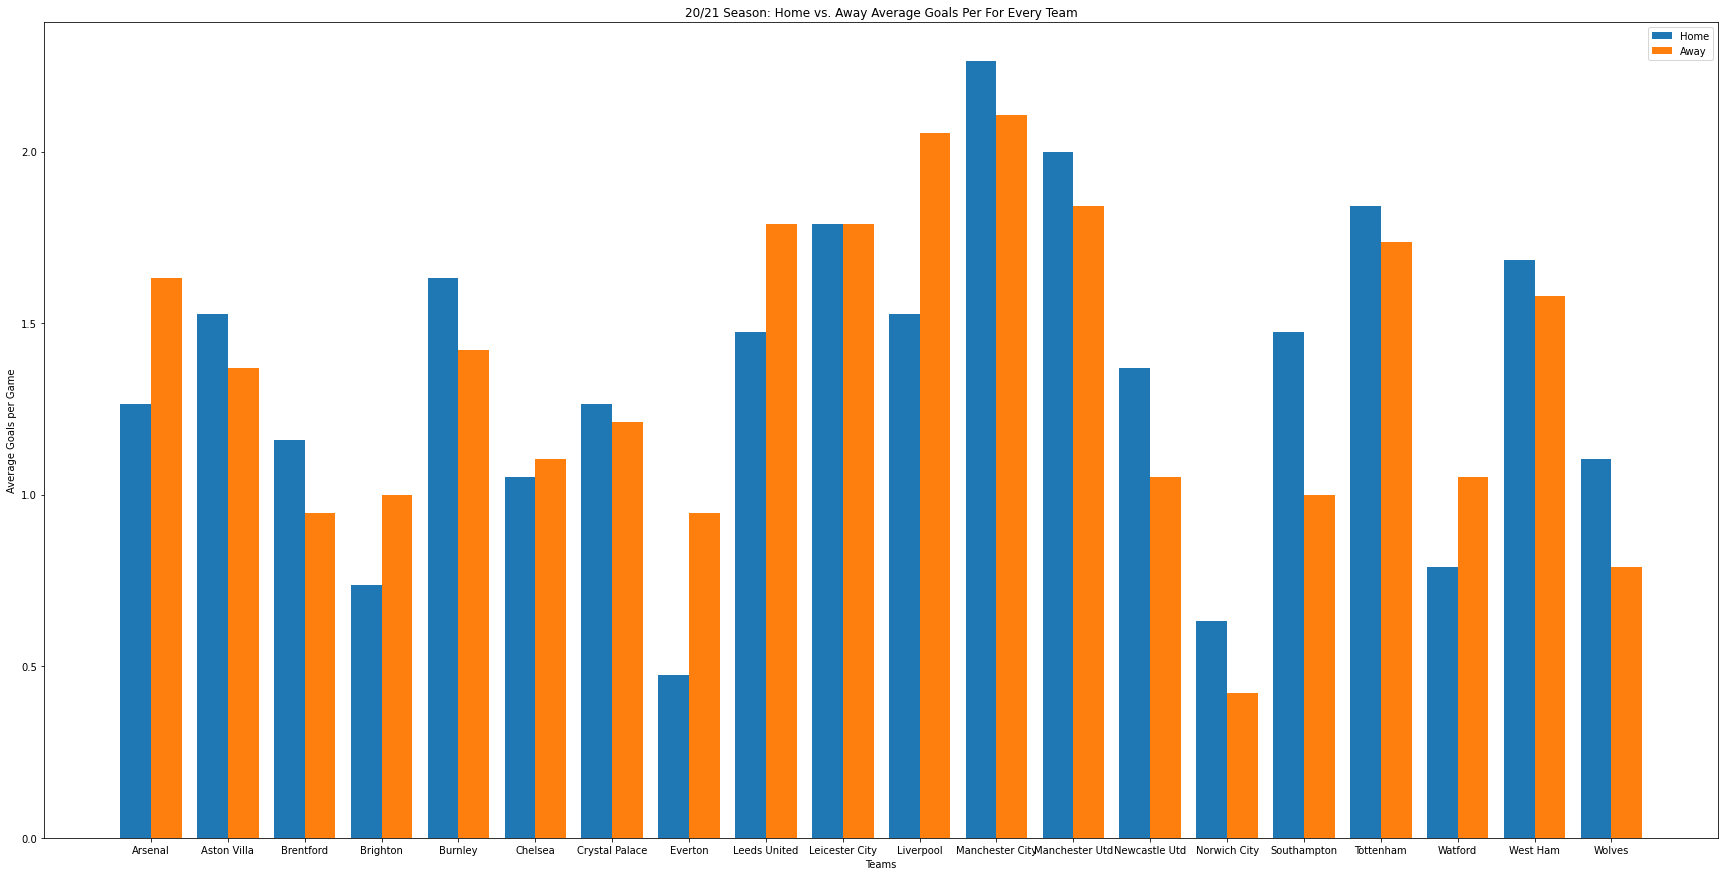

In [16]:
X_axis = np.arange(len(teams))
  
plt.bar(X_axis - 0.2, pl21.groupby("Home").Home_Score.mean(), 0.4, label = 'Home')
plt.bar(X_axis + 0.2, pl21.groupby("Away").Away_Score.mean(), 0.4, label = 'Away')
  
plt.xticks(X_axis, teams)
plt.xlabel("Teams")
plt.ylabel("Average Goals per Game")
plt.title("20/21 Season: Home vs. Away Average Goals Per For Every Team")
plt.rcParams["figure.figsize"] = (30,15)
plt.legend()
plt.show()

## Creating new columns/features
--- 

In [17]:
# these two functions will help retreive the home and away stats I create in future functions that return lists
def hstat(stat):
  return stat[0]

def astat(stat):
  return stat[1]

In [18]:
games_played = {}
for i in teams:
  games_played[i] = 0


def gp(row):
# This function is doing two things:
# 1) returning the home and away games played up before the match
# 2) updating our dictionary to add increment games played after the match
  h = games_played[row.Home]
  a = games_played[row.Away]
  games_played[row.Home] += 1
  games_played[row.Away] += 1
# I return a list in order to get points for both teams
# I will need to split this list up into the two different columns later. 
  return [h,a]

df1["gp"] = df1.apply(gp, axis = "columns")

df1["Home_gp"] = df1["gp"].apply(hstat)
df1["Away_gp"] = df1["gp"].apply(astat)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [19]:
#creating an empty dictionary to keep track of the total points a certain team has
team_pts = {}
for i in teams:
  team_pts[i] = 0


def tpts(row):
# This function is doing two things:
# 1) returning the home and away points up before the match
# 2) updating our dictionary to add the ponints received after the match
  h = team_pts[row.Home]
  a = team_pts[row.Away]
  if row.Result == "H":
    team_pts[row.Home] += 3
  elif row.Result == "A":
    team_pts[row.Away] += 3
  elif row.Result == None:
    return None
  else:
    team_pts[row.Home] += 1
    team_pts[row.Away] += 1
# I return a list in order to get points for both teams
# I will need to split this list up into the two different columns later. 
  return [h,a]

df1["pts"] = df1.apply(tpts, axis = "columns")

df1["Home_pts"] = df1.pts.apply(hstat)
df1["Away_pts"] = df1.pts.apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [20]:
df1["Home_ppg"] = df1["Home_pts"]/ df1["Home_gp"]
df1["Away_ppg"] = df1["Away_pts"]/ df1["Away_gp"]

df1[['Home_ppg', "Away_ppg"]] = df1[['Home_ppg', "Away_ppg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [21]:
team_form = {}
for i in teams:
  team_form[i] = ""

def form(row):
  h = team_form[row.Home]
  a = team_form[row.Away]
  if row.Result == "H":
    team_form[row.Home] += "W"
    team_form[row.Away] += "L"
  elif row.Result == "A":
    team_form[row.Home] += "L"
    team_form[row.Away] += "W"
  else:
    team_form[row.Home] += "D"
    team_form[row.Away] += "D"
  return [h[-5:],a[-5:]]

df1["form"] = df1.apply(form, axis = "columns")

df1["Home_form"] = df1.form.apply(hstat)
df1["Away_form"] = df1.form.apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [22]:
# Here I create a dictionary to assign points to different results
fp = {"W":3,"D":1,"L":0}

# The function here gets the total form points from my form columns
def formpts(form):
  total = 0
  for i in form:
    total += fp[i]
  return total

df1["Away_fp"] = df1["Away_form"].apply(formpts)
df1["Home_fp"] = df1["Home_form"].apply(formpts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [23]:
# With this dictionary I use arrays for my values.
# This is to help keep track of the number of goals scored in each game.
# It also helps when i want to calculate the means / tandard deviations
gs = {}
for i in teams:
  gs[i] = np.array([])

def goals(row):
  h = gs[row.Home]
  a = gs[row.Away]
  gs[row.Home] = np.append(gs[row.Home],row.Home_Score)
  gs[row.Away] = np.append(gs[row.Away],row.Away_Score) 
  return [h.sum(),a.sum()]

df1["goals"] = df1.apply(goals, axis = "columns")

df1["Home_gs"] = df1["goals"].apply(hstat)
df1["Away_gs"] = df1["goals"].apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [24]:
df1["Home_gspg"] = df1["Home_gs"]/ df1["Home_gp"]
df1["Away_gspg"] = df1["Away_gs"]/ df1["Away_gp"]

df1[['Home_gspg', "Away_gspg"]] = df1[['Home_gspg', "Away_gspg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [25]:
# With this dictionary I use arrays for my values.
# This is to help keep track of the number of goals scored in each game.
# It also helps when i want to calculate the means / tandard deviations
gc = {}
for i in teams:
  gc[i] = np.array([])

def goals_conceded(row):
  h = gc[row.Home]
  a = gc[row.Away]
  gc[row.Home] = np.append(gc[row.Home],row.Away_Score)
  gc[row.Away] = np.append(gc[row.Away],row.Home_Score) 
  return [h.sum(),a.sum()]

df1["gc"] = df1.apply(goals_conceded, axis = "columns")

df1["Home_gc"] = df1["gc"].apply(hstat)
df1["Away_gc"] = df1["gc"].apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [26]:
df1["Home_gcpg"] = df1["Home_gc"]/ df1["Home_gp"]
df1["Away_gcpg"] = df1["Away_gc"]/ df1["Away_gp"]

df1[['Home_gcpg', "Away_gcpg"]] = df1[['Home_gcpg', "Away_gcpg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [27]:
# Dropping and Re-arranging columns
df1 = df1[['Wk', 'Day', 'Date', 'Time', 'Home', 'HxG', 'Home_Score', 'Away_Score',
       'AxG', 'Away', 'Result', 'Attendance', 'Venue', 'Referee', 'Home_gp', 'Away_gp', 'Home_pts', 'Away_pts',
       'Home_ppg', 'Away_ppg','Home_form', 'Away_form', 'Home_fp',
       'Away_fp','Home_gs', 'Away_gs', 'Home_gc', 'Away_gc', "Home_gspg", "Away_gspg", 'Home_gcpg', "Away_gcpg"]]

In [28]:
df1[df1.Result == "D"]

,Wk,Day,Date,Time,Home,HxG,Home_Score,Away_Score,AxG,Away,...,Home_fp,Away_fp,Home_gs,Away_gs,Home_gc,Away_gc,Home_gspg,Away_gspg,Home_gcpg,Away_gcpg
14,2.0,Sat,2021-08-21,15:00,Leeds United,1.5,2.0,2.0,2.0,Everton,...,0,3,1.0,3.0,5.0,1.0,1.000000,3.000000,5.000000,1.000000
15,2.0,Sat,2021-08-21,15:00,Crystal Palace,0.6,0.0,0.0,0.9,Brentford,...,0,3,0.0,2.0,3.0,0.0,0.000000,2.000000,3.000000,0.000000
18,2.0,Sun,2021-08-22,14:00,Southampton,0.8,1.0,1.0,1.4,Manchester Utd,...,0,3,1.0,5.0,3.0,1.0,1.000000,5.000000,3.000000,1.000000
24,3.0,Sat,2021-08-28,15:00,West Ham,1.2,2.0,2.0,0.7,Crystal Palace,...,6,1,8.0,0.0,3.0,3.0,4.000000,0.000000,1.500000,1.500000
25,3.0,Sat,2021-08-28,15:00,Aston Villa,0.6,1.0,1.0,1.1,Brentford,...,3,4,4.0,2.0,3.0,0.0,2.000000,1.000000,1.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,30.0,Wed,2022-05-11,19:45,Watford,0.3,0.0,0.0,1.2,Everton,...,0,10,32.0,37.0,70.0,56.0,0.914286,1.088235,2.000000,1.647059
423,37.0,Sun,2022-05-15,14:00,Leeds United,2.0,1.0,1.0,2.2,Brighton,...,4,10,39.0,38.0,77.0,42.0,1.083333,1.055556,2.138889,1.166667
425,37.0,Sun,2022-05-15,14:00,Wolves,0.9,1.0,1.0,1.3,Norwich City,...,1,0,36.0,22.0,39.0,78.0,1.000000,0.611111,1.083333,2.166667
426,37.0,Sun,2022-05-15,14:00,Aston Villa,1.0,1.0,1.0,1.3,Crystal Palace,...,7,7,48.0,46.0,49.0,42.0,1.371429,1.314286,1.400000,1.200000


In [29]:
df1.to_excel("premier_league.xlsx")